# Writing K-Nearest Neibhbors Algorithm

## Euclidean Distance

This Euclid guy was some hell of a person. The father of geometry. When the first printing was created the first thing printed was bible and probably the next was this Euclid's book on geometry (The bible of geometry).

sqrt(Sum{i=1 to n} - (qi - pi)^2)

### Getting into the calculation

q = (1, 3)
p = (2, 5)

<pre>
Here,
    n = 2

Calculation,
    sqrt( (q1 - p1)^2 + (q2 - p2)^2)
    = sqrt( (1-2)^2 + (3 - 5)^2)
    = sqrt( 1 + 4)
    = sqrt(5)
</pre>

In [1]:
from math import sqrt

plot1 = [1, 3]
plot2 = [2, 5]

euclidean_distance = sqrt( (plot1[0] - plot2[0])**2 +  (plot1[1] - plot2[1])**2)

print(euclidean_distance)

2.23606797749979


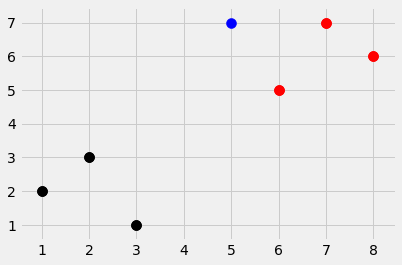

In [5]:
import numpy as np #it has a built in euclidean distance function
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

'''
k = features
r = class
'''
dataset = {
    'k': [[1, 2], [2, 3], [3, 1]],
    'r': [[6, 5], [7, 7], [8, 6]]
}

new_features = [5, 7]

'''
for i in dataset:
    for feature in dataset[1]:
        plt.scatter(feature[0], feature[1], s = 100, color = i)
'''

#The above code in one line
[[plt.scatter(feature[0], feature[1], s = 100, color = i) for feature in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100, color = 'b')
plt.show()



r


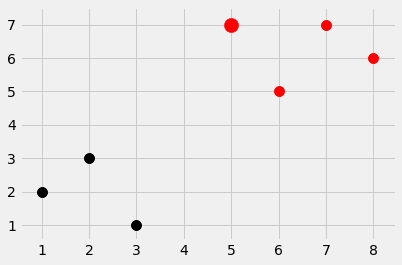

In [22]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a values less tha total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            # This is the built in euclidean distance formula
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    
    votes = [distance[1] for distance in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    
    #The confidence
    confidence = Counter(votes).most_common(1)[0][1] / k
    
    return vote_result, confidence

result, confidence = k_nearest_neighbors(dataset, new_features, k=3)
print(result)

[[plt.scatter(feature[0], feature[1], s = 100, color = i) for feature in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=200, color = result)
plt.show()

In [25]:
# Testing our algorithm with that of the scikit learn's

import pandas as pd
import random

df = pd.read_csv('bcw.data')
df.replace('?', -99999, inplace = True)
df.drop(['id'], 1, inplace = True)

accuracies = []
for i in range(10):
    full_data = df.astype(float).values.tolist() #convert data to float
    random.shuffle(full_data)

    test_size = 0.2
    train_set = {2:[], 4:[]}
    test_set = {2:[], 4:[]}
    train_data = full_data[:-int(test_size*len(full_data))]
    test_data = full_data[-int(test_size*len(full_data)):]

    for i in train_data:
        train_set[i[-1]].append(i[:-1])

    for i in test_data:
        test_set[i[-1]].append(i[:-1])

    correct = 0
    total = 0

    for group in test_set:
        for data in test_set[group]:
            #fiddle with k and check
            vote, confidence = k_nearest_neighbors(train_set, data, k=5)
            if group == vote:
                correct += 1
            else:
                pass
                #print(confidence)
            total += 1

    #print('Accuracy: ', correct/total)
    accuracies.append(correct/total)
    
print(sum(accuracies)/len(accuracies))

0.9697841726618706


In [30]:
#Comparing the result with the sklearn K-Nearest Neighbor
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd

df = pd.read_csv('bcw.data')
df.replace('?', -99999, inplace = True)
df.drop(['id'], 1, inplace = True)
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

accuracies = []
for i in range(10):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train, y_train)

    accuracy = clf.score(X_test, y_test)
    #print(accuracy)
    accuracies.append(correct/total)
    
print(sum(accuracies)/len(accuracies))

0.9424460431654678
